### Importing Libraries


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset & Extracting Features

In [24]:
dis = pd.read_csv('../data/dateset1/Training.csv')
dis

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [25]:
X = dis.iloc[:, :-1].values
X

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]], dtype=int64)

In [26]:
y = dis.iloc[:, -1].values
y

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

### Data Splitting & Preprocessing 


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Training & Predicting

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9, metric= 'minkowski', p = 2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
y_pred = clf.predict(X_test)
y_pred

array(['Acne', 'Acne', 'Hyperthyroidism', ..., 'Migraine',
       'Hypothyroidism', 'Dengue'], dtype=object)

In [31]:
y_test

array(['Acne', 'Acne', 'Hyperthyroidism', ..., 'Migraine',
       'Hypothyroidism', 'Dengue'], dtype=object)

### Model Evaluation


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0, ...,  0,  0,  0],
       [ 0, 39,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  0,  0, ...,  0, 37,  0],
       [ 0,  0,  0, ...,  0,  0, 39]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.9966124661246613

### Choosing Best Value of 'K'


In [34]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)


In [35]:
test_error_rates

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002032520325203291,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744,
 0.003387533875338744]

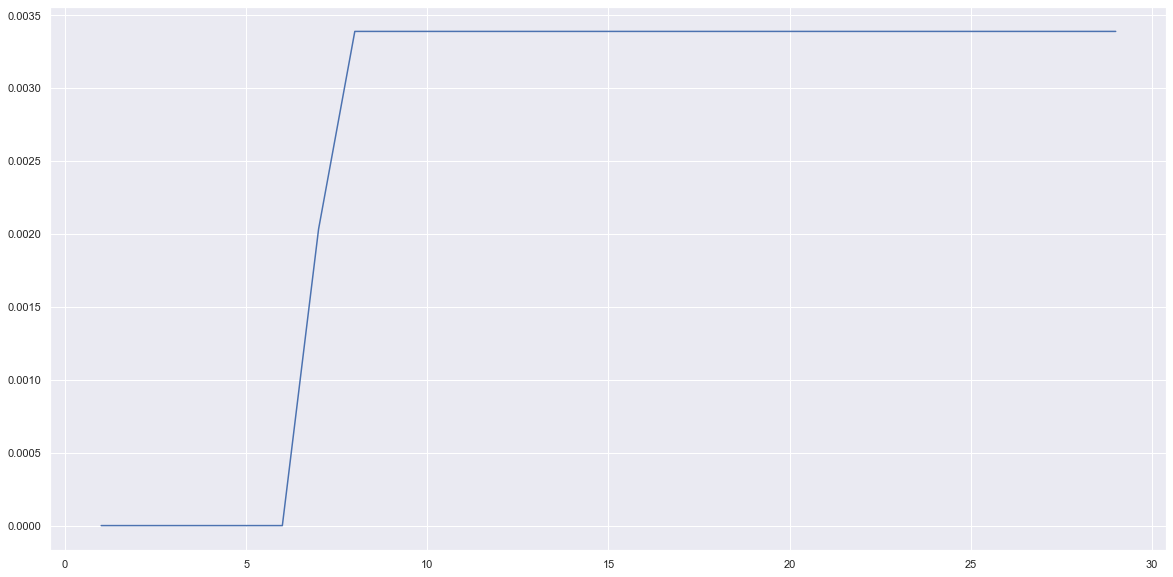

In [45]:
plt.figure(figsize=(20,10))
plt.plot(range(1,30), test_error_rates)

### Cross-Validation with `cross_val_score`


In [37]:
from sklearn.model_selection import cross_val_score

In [42]:
scores = cross_val_score(clf, X_train, y_train,cv=10)
scores

array([0.99710145, 0.99130435, 1.        , 0.99710145, 0.99709302,
       1.        , 1.        , 0.99709302, 1.        , 1.        ])

In [43]:
scores.mean()

0.997969329288844